# Exploratory analysis of seasonal timeseries

In [3]:
source('../NMEG_utils/r_functions/load_nmeg.r')

mpj <- daily_to_xts(get_daily_file('Mpj', 'aflx', make_new=FALSE))
mpj_s <- daily_to_xts(get_daily_file('Mpj', 'soilmet', make_new=FALSE))

In [4]:
df1 <- mpj

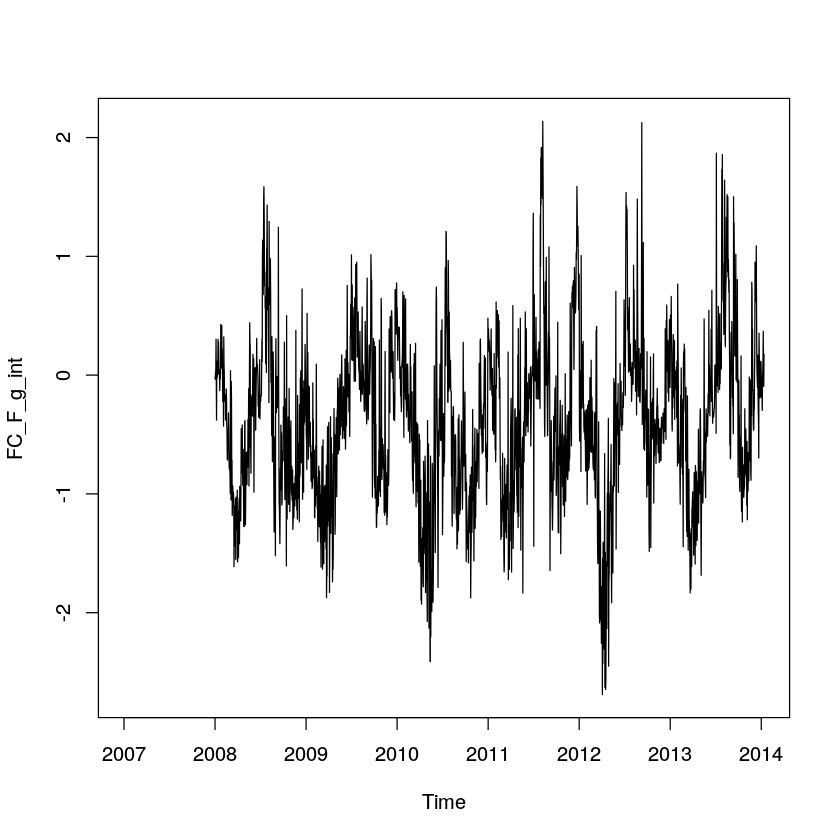

In [5]:
df1_ts<-ts(df1$FC_F_g_int, frequency = 365, start = c(2007, 1, 1),end = c(2014, 12, 31))
plot.ts(df1_ts)

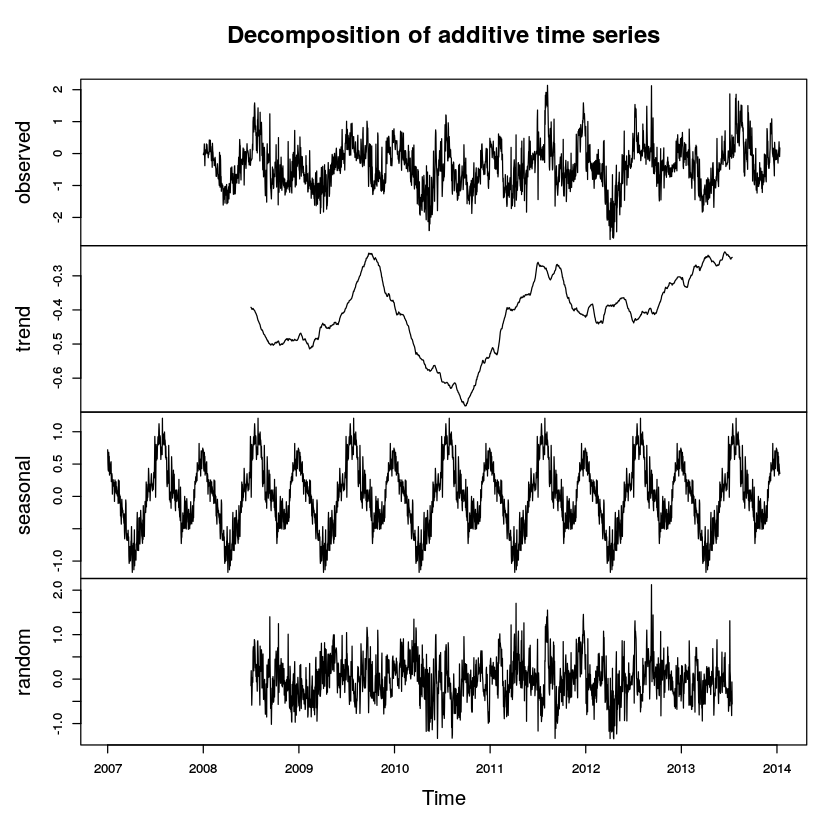

Loading required package: timeDate
This is forecast 6.2 



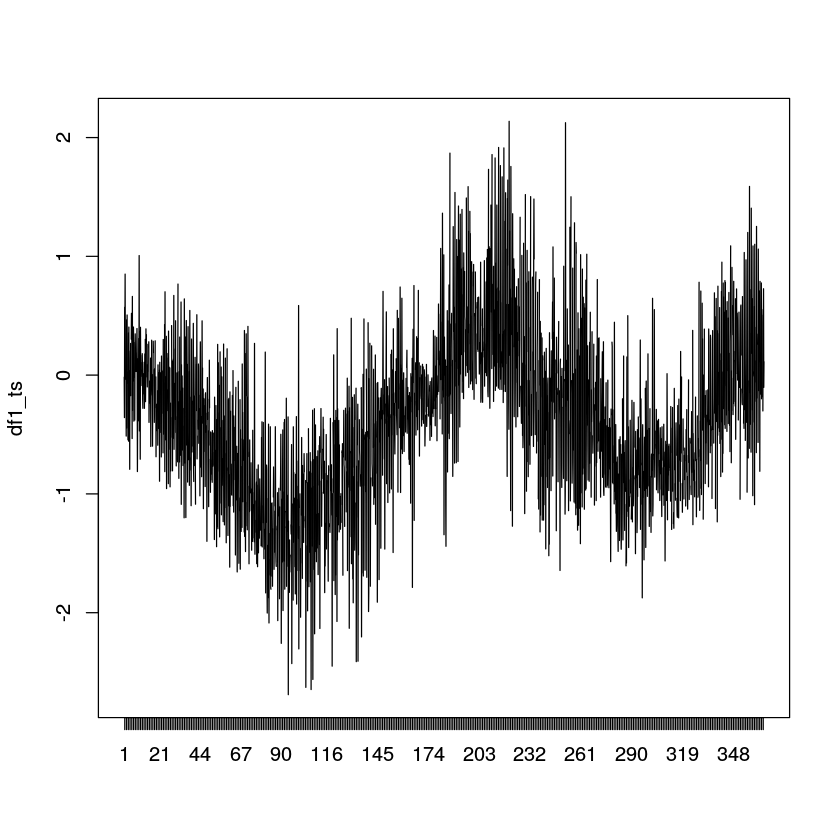

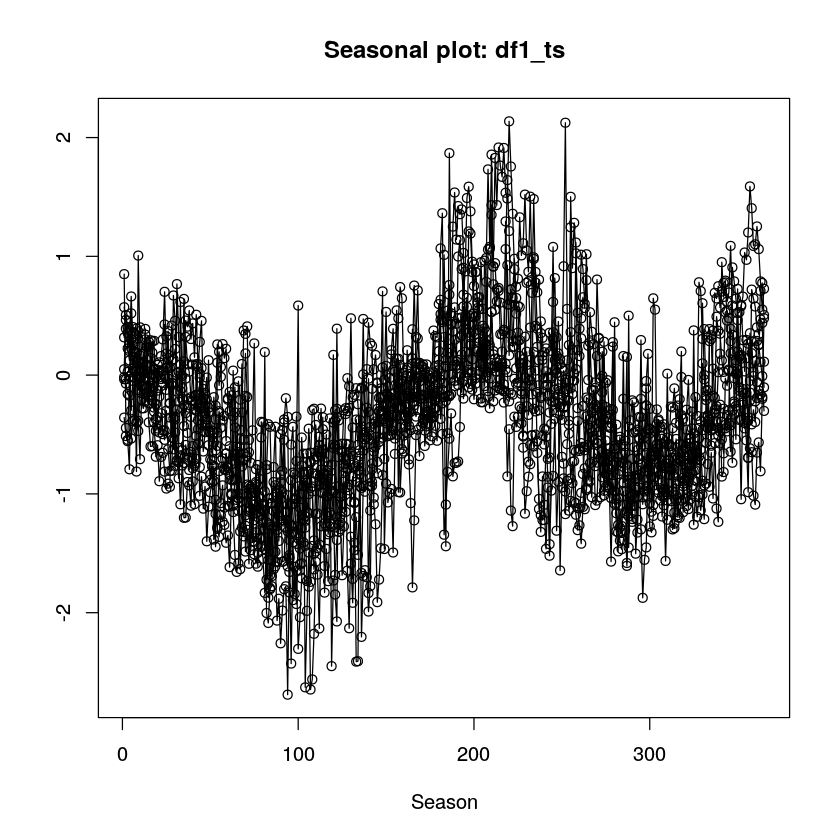

In [6]:
#Decomposition methods for seasonality
d_df1_ts<-decompose(df1_ts)
plot(d_df1_ts)
monthplot(df1_ts)
library(forecast)
seasonplot(df1_ts) 

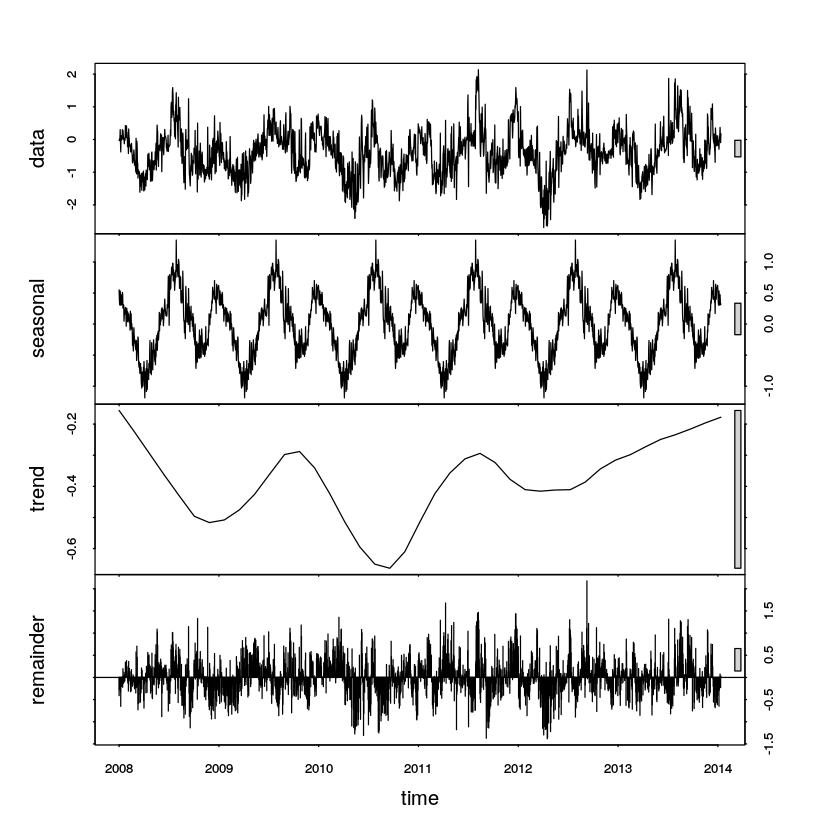

In [7]:
# seasonal decomposition using loess
sdFC <- stl(df1_ts, s.window="period", na.action=na.omit)
plot(sdFC)

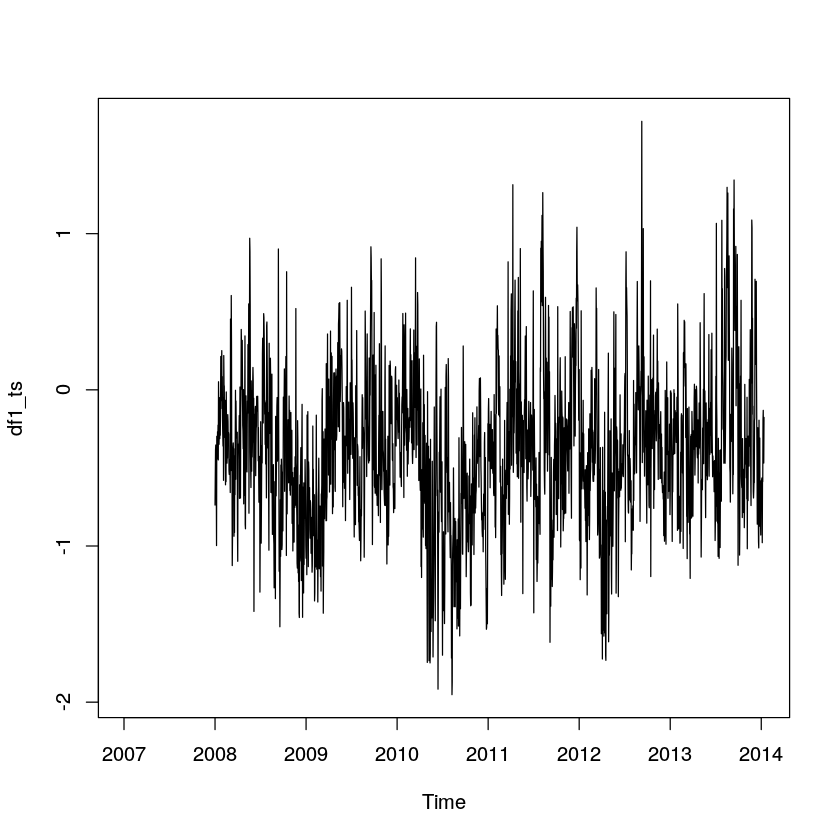

In [8]:
seasonalADJ<-df1_ts - d_df1_ts$seasonal
plot(seasonalADJ)

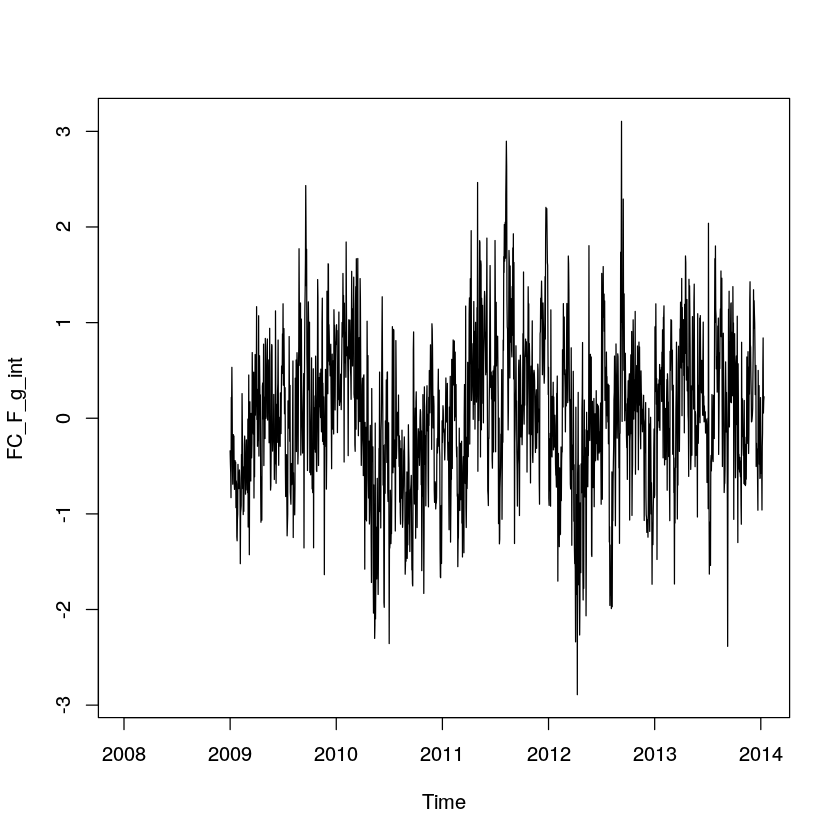

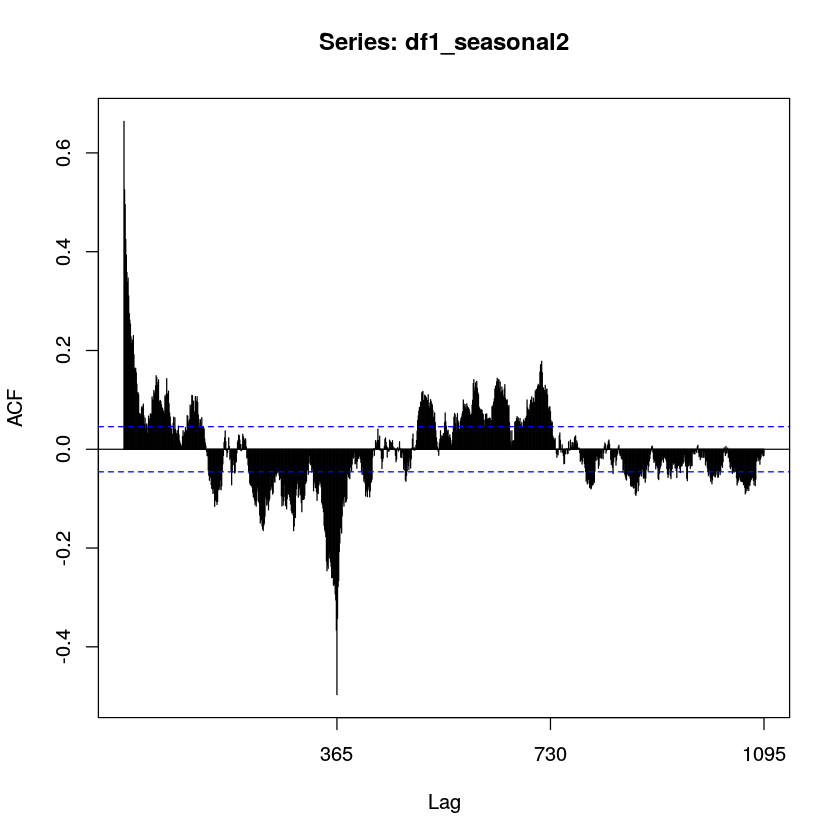

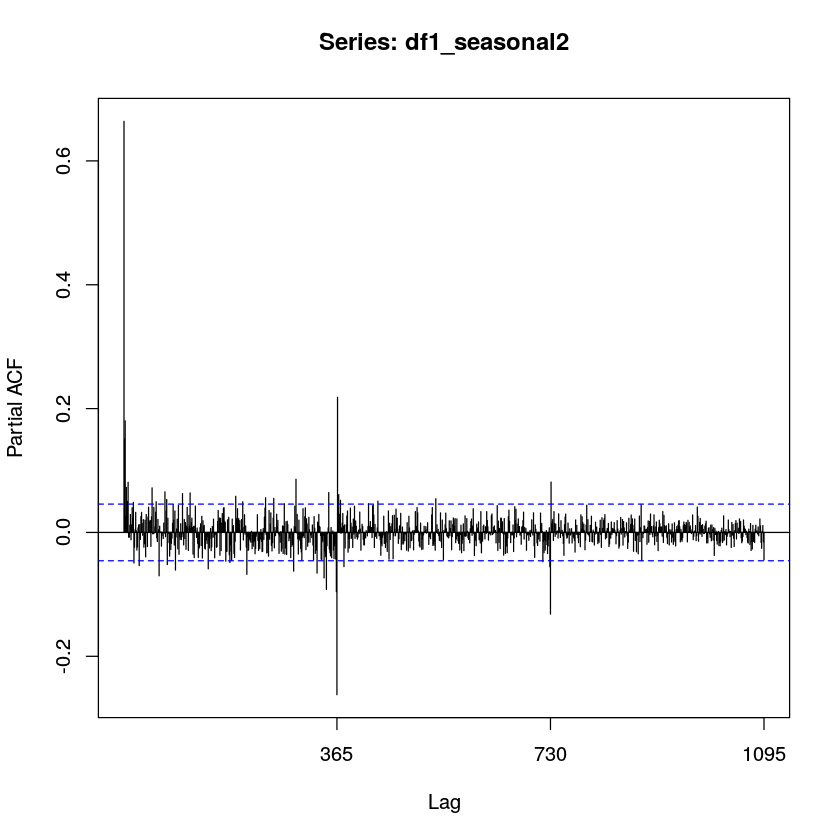

In [9]:
# an alternative way to adjust for seasonal differences
df1_seasonal2<-diff(df1_ts, 365)
plot(df1_seasonal2)
Acf(df1_seasonal2,lag.max=3*365)
Pacf(df1_seasonal2,lag.max=3*365)

In [10]:
# 1) Test for stationarity
# Augemented Dickey-Fuller Test
# A significant p-value means that no unit root is present (no need for differencing)
# Rejecting the null hypothesis suggests that a time series as stationary (from the tseries package)
library(tseries)
sum(is.na(df1_ts))
adf.test(df1_ts[366:nrow(df1_ts)])
ndiffs(df1_ts)
nsdiffs(df1_ts)

[1] 365

Warning message:
In adf.test(df1_ts[366:nrow(df1_ts)]): p-value smaller than printed p-value


	Augmented Dickey-Fuller Test

data:  df1_ts[366:nrow(df1_ts)]
Dickey-Fuller = -5.452, Lag order = 13, p-value = 0.01
alternative hypothesis: stationary


[1] 0

[1] 0

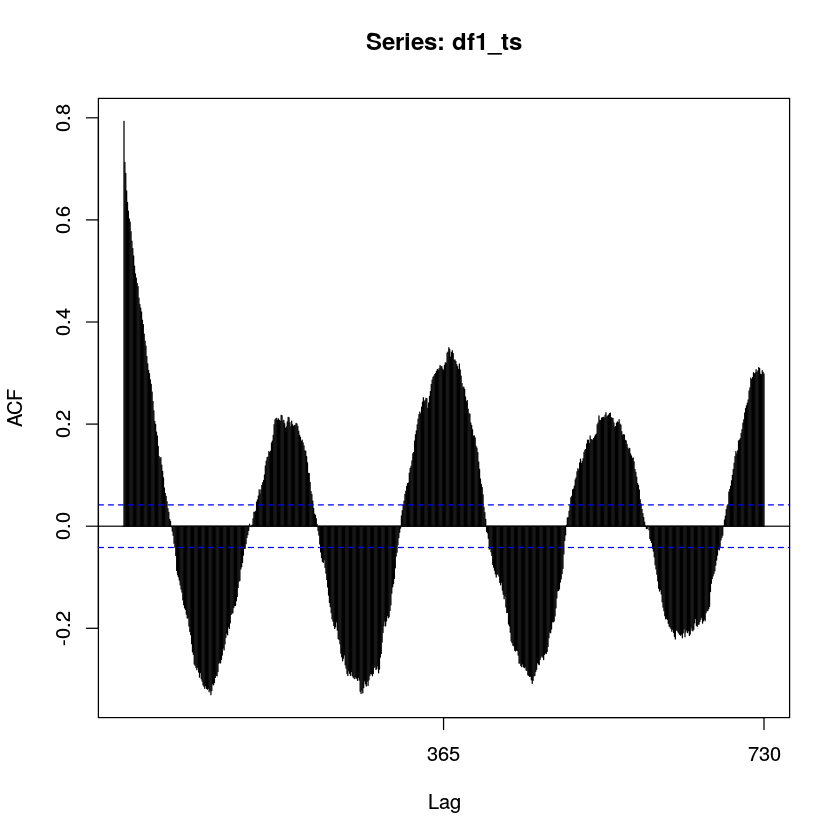

In [11]:
Acf(df1_ts,lag.max=2*365)
#Acf(df1_ts,lag.max=2*365,plot=FALSE) # this prints out the autocorrelation values


Call:
arima(x = df1_ts, order = c(0, 0, 0), seasonal = list(order = c(0, 1, 0), period = 365))


sigma^2 estimated as 0.6216:  log likelihood = -2169.84,  aic = 4341.68

Training set error measures:
                     ME      RMSE       MAE      MPE     MAPE     MASE
Training set 0.02420953 0.7200977 0.5170202 3.610055 428.9583 1.614506
                  ACF1
Training set 0.6640237


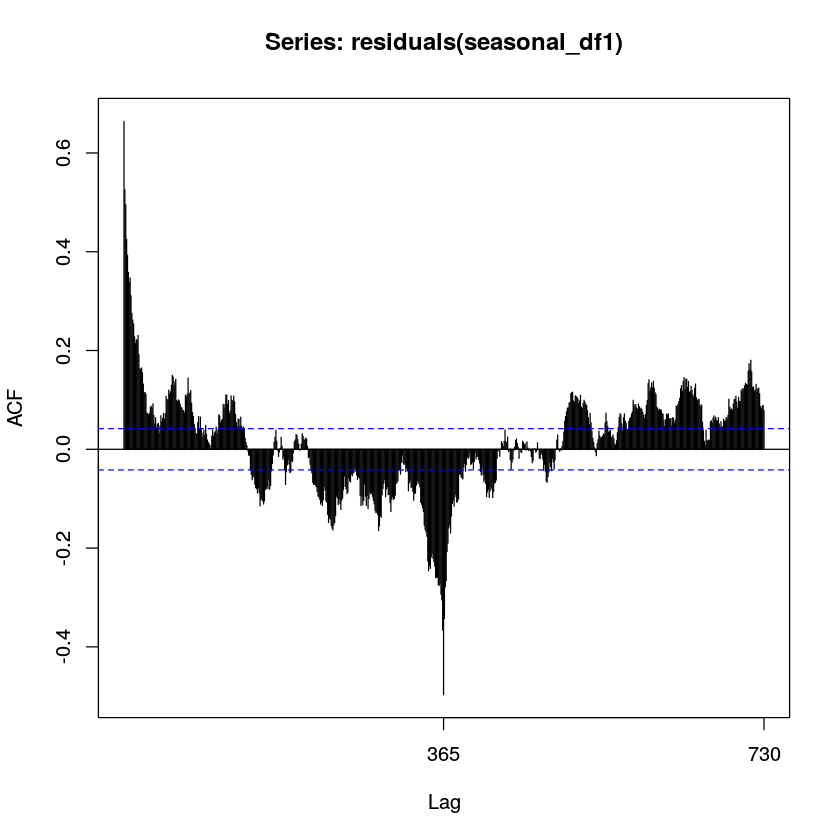

In [12]:
seasonal_df1<-arima(df1_ts,order=c(0,0,0),
                   seasonal=list(order=c(0,1,0),period=365))
res_df1<-(residuals(seasonal_df1))
Acf(residuals(seasonal_df1))
summary(seasonal_df1)